# Exercícios 04

- Questões do CEO:

1. Crie uma nova coluna chamada:“dormitory_type”:
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

2. Faça um gráfico de barras que represente a soma dos preços pelonúmero de quartos.

3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

7. Crie um Dashboard com os gráficos das questões 02, 03, 04( Dashboard: 1 Linha e 2 colunas )

8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

9. Crie um Dashboardcom os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

# 0.1 - IMPORTANDO AS BIBLIOTECAS 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import plotly.express as px
%matplotlib inline

# 0.2 - IMPORTANDO OS DADOS

In [2]:
df4= pd.read_csv('./kc_house_data.csv')

In [3]:
df4.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12475,8651520160,20140707T000000,645000.0,4,2.5,2690,18653,2.0,0,0,...,8,2690,0,1985,0,98074,47.6449,-122.059,2230,9744


# 1. Crie uma nova coluna chamada:“dormitory_type”:

Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
Se o valor da coluna “bedrooms” forigual a 2 => ‘apartament’
Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


In [4]:
#criar uma nova coluna 
# fazer uma condição para atribuir os perfis

df4['dormitory_type'] = df4['bedrooms'].apply(lambda x: 'studio' if x==1 else 'apartament' if x==2 else 
                                              'house' if x>2 else 'NA')
                                            

# 2. Faça um gráfico de barras que represente a soma dos preços pelo números de quartos.

In [5]:
aux1 = df4[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

In [6]:
aux1.head()

,bedrooms,price
0,0,5.323550e+06
1,1,6.321093e+07
2,2,1.107789e+09
3,3,4.580264e+09
4,4,4.372957e+09


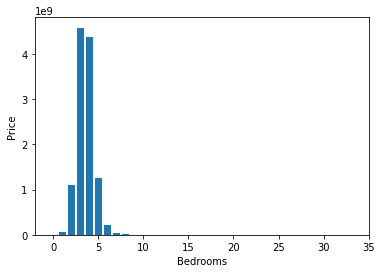

In [7]:
plt.bar(aux1['bedrooms'],aux1['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price');

# 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [8]:
# transformar as datas (em datetime)
# selecionar o coluna de preços e ano de construção



aux2= df4[['price','yr_built']].groupby('yr_built').mean().reset_index()

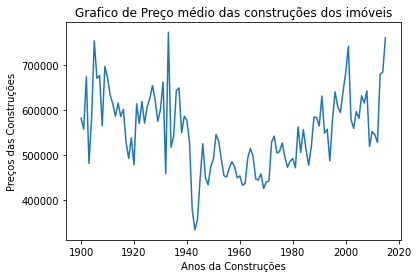

In [9]:
plt.plot(aux2['yr_built'],aux2['price'])
plt.title('Grafico de Preço médio das construções dos imóveis')
plt.xlabel('Anos da Construções')
plt.ylabel('Preços das Construções');

# 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [10]:
aux3= df4[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()

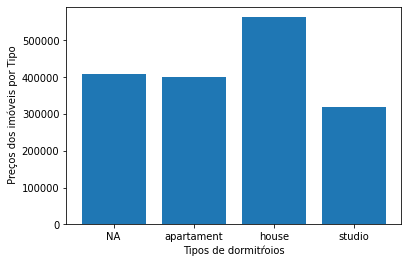

In [11]:
plt.bar(aux3['dormitory_type'],aux3['price'])
plt.xlabel('Tipos de dormitŕoios')
plt.ylabel(' Preços dos imóveis por Tipo');

# 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [12]:
# coluna da reforma e de preços
# fazer um filtro para selecionar as datas
# não esquecr de transformar em data

filtro= df4[df4['yr_renovated']>=1930]

In [13]:
aux4 = filtro[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()

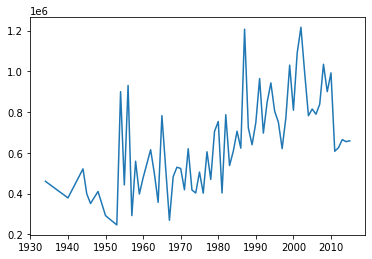

In [14]:
plt.plot(aux4['yr_renovated'],aux4['price']);

# 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [15]:
aux5= df4[['price','dormitory_type','yr_built']].groupby(['dormitory_type','yr_built']).mean().reset_index()

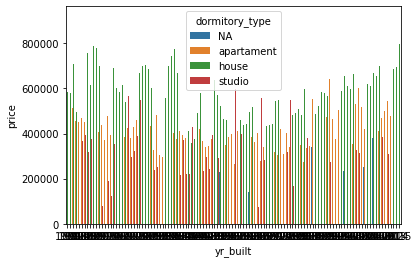

In [16]:
sns.barplot(x = 'yr_built', y = 'price', hue = 'dormitory_type', data = aux5);



# 7. Crie um Dashboard com os gráficos das questões 02, 03, 04( Dashboard: 1 Linha e 2 colunas )

<BarContainer object of 4 artists>

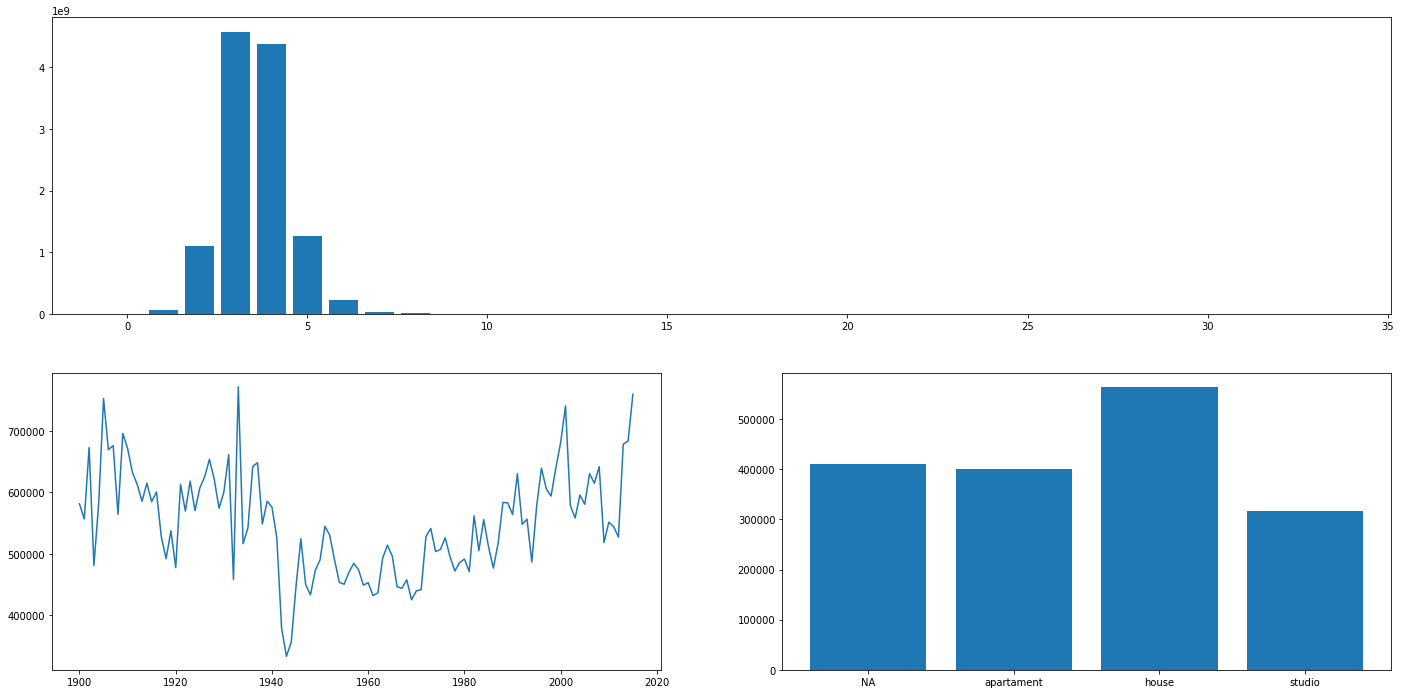

In [17]:
fig = plt.figure(figsize=(24,12))

specs = gridspec.GridSpec(nrows=2 , ncols=2, figure=fig)


ax1= fig.add_subplot(specs[0,:])
ax2= fig.add_subplot(specs[1,0])
ax3= fig.add_subplot(specs[1,1])

aux1= df4[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(aux1['bedrooms'],aux1['price'])

aux2= df4[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot(aux2['yr_built'],aux2['price'])

aux3= df4[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(aux3['dormitory_type'],aux3['price'])

# 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

<BarContainer object of 4 artists>

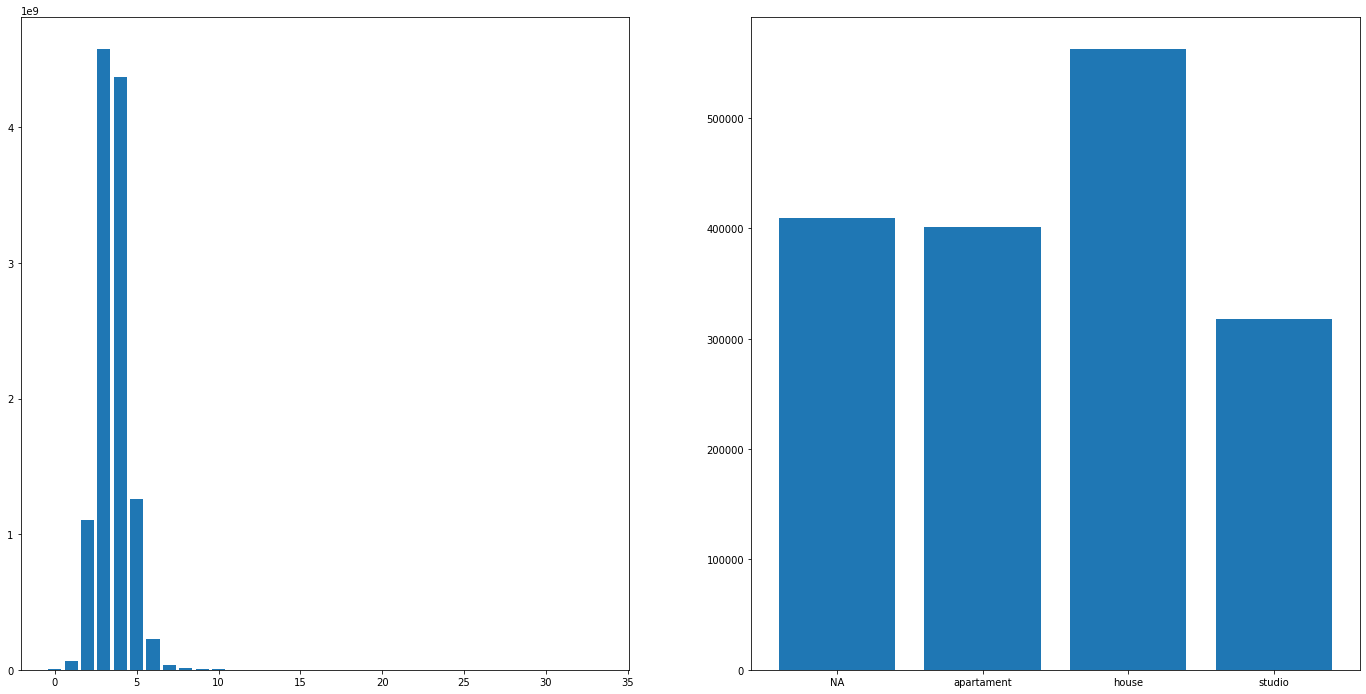

In [18]:
fig2 = plt.figure(figsize=(24,12))

specs2= gridspec.GridSpec(nrows=1, ncols=2, figure=fig2)

dash1= fig2.add_subplot(specs2[0,0])
dash2= fig2.add_subplot(specs2[0,1])

#question 02

aux1 = df4[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
dash1.bar(aux1['bedrooms'],aux1['price'])


aux3= df4[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
dash2.bar(aux3['dormitory_type'],aux3['price'])

# 9. Crie um Dashboardcom os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

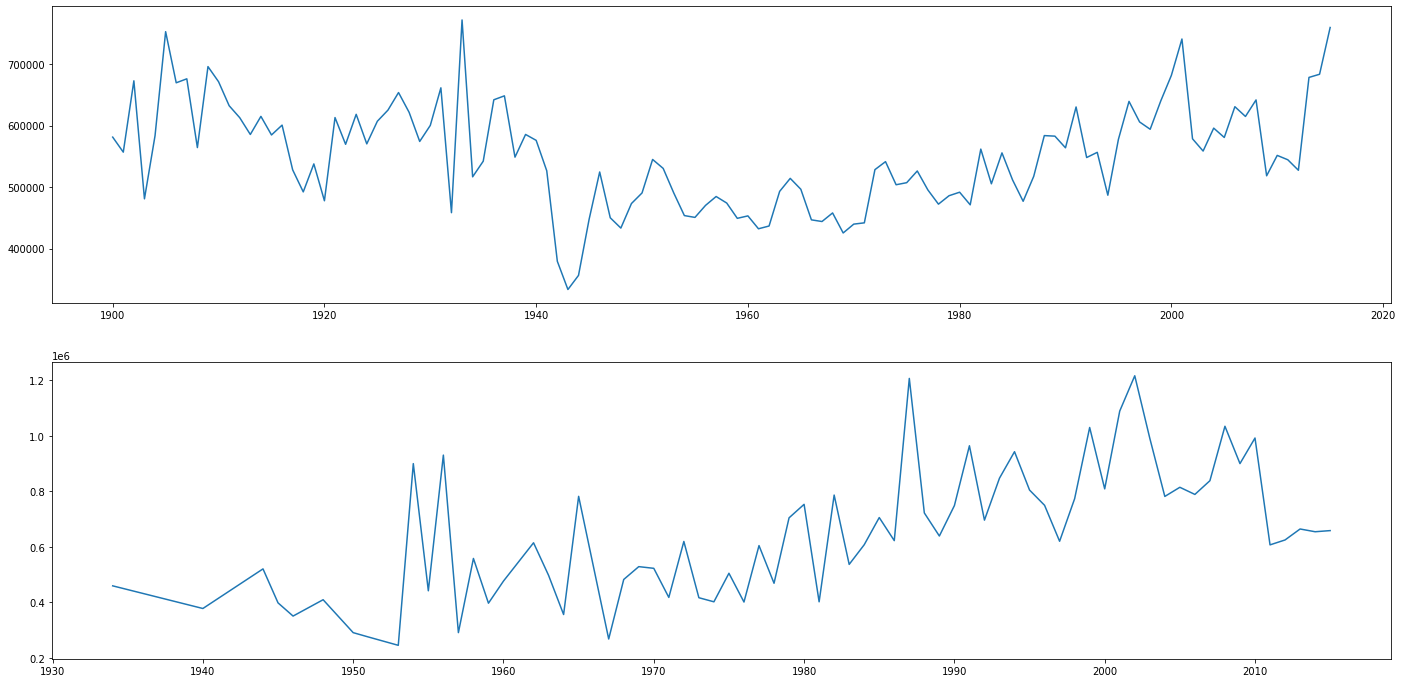

In [19]:
fig3 = plt.figure(figsize=(24,12))

specs3= gridspec.GridSpec(nrows=2, ncols=1, figure=fig3)

dash2= fig3.add_subplot(specs3[0,:])
dash3= fig3.add_subplot(specs3[1,:])

aux2= df4[['price','yr_built']].groupby('yr_built').mean().reset_index()
dash2.plot(aux2['yr_built'],aux2['price'])

filtro= df4[df4['yr_renovated']>=1930]
aux4 = filtro[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
dash3.plot(aux4['yr_renovated'],aux4['price'])

# 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [32]:
mapa= df4[['id','sqft_living','id','long','lat','price']]

fig= px.scatter_mapbox( mapa,
                       lat=  'lat',
                       lon= 'long',
                       size= 'sqft_living',
                       color_continuous_scale= px.colors.cyclical.IceFire,
                      size_max= 15,
                      zoom= 15)

fig.update_layout(mapbox_style= 'open-street-map')

fig.update_layout(height=600, margin= {'r':0, 't':0, 'l':0, 'b': 0} )

fig.show()